In [1]:
!pip install tensorflow numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [3]:
dataset_path = "rambutan_dataset"

In [4]:
# Define ImageDataGenerator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values
    rotation_range=20,     # Rotate images randomly
    width_shift_range=0.2, # Shift images horizontally
    height_shift_range=0.2,# Shift images vertically
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Zoom in images
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.2   # Split dataset (80% train, 20% validation)
)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Image size
    batch_size=32,           # Number of images per batch
    class_mode='categorical', # Multi-class classification
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get Class Labels
class_labels = list(train_generator.class_indices.keys())
print(f"Class Labels: {class_labels}")

Found 58 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Class Labels: ['Defective_Rambutans', 'Healthy_Rambutans', 'Raw_Rambutans']


In [5]:
# Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(class_labels), activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()


C:\Users\shanu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras import Input

# Define Model
model = models.Sequential([
    Input(shape=(150, 150, 3)),  # ✅ Define input layer separately
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')
])


In [7]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Adjust epochs based on performance
    verbose=1
)

ValueError: You must call `compile()` before using the model.

In [8]:
# Ensure Model is Compiled Before Training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Adjust epochs based on performance
    verbose=1
)

C:\Users\shanu\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2716 - loss: 1.6646

C:\Users\shanu\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2787 - loss: 1.8468 - val_accuracy: 0.2857 - val_loss: 1.0910
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3549 - loss: 1.2107 - val_accuracy: 0.2857 - val_loss: 1.1012
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4439 - loss: 1.0846 - val_accuracy: 0.5000 - val_loss: 1.0079
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.4385 - loss: 1.0452 - val_accuracy: 0.4286 - val_loss: 0.9458
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4642 - loss: 0.9671 - val_accuracy: 0.4286 - val_loss: 0.8428
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5032 - loss: 0.9047 - val_accuracy: 0.5714 - val_loss: 0.7429
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6013 - loss: 0.8419 - val_accuracy: 0.7143 - val_loss: 0.6181
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6446 - loss: 0.7792 - val_accuracy: 0.7143 - val_loss: 0.5840
Epoch 9/20
2/2 ━━━━━━━━━━━━

In [9]:
# Evaluate Model on Validation Set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8571 - loss: 0.4542
Validation Accuracy: 85.71%


In [10]:
model.save("rambutan_cnn_model.h5")

In [11]:
model.save("rambutan_cnn_model.keras")  # ✅ Recommended Keras format

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


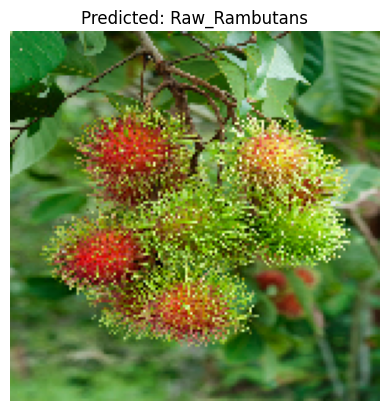

Predicted Class: Raw_Rambutans


In [25]:
from tensorflow.keras.preprocessing import image

# Path to Test Image
test_image_path = "test.jpg"  # Change this to your test image path

# Load & Preprocess Image
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Convert to batch
img_array /= 255.0  # Normalize

# Make Prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Display Result
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

print(f"Predicted Class: {class_labels[predicted_class[0]]}")

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Get training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


NameError: name 'history' is not defined

In [4]:
import matplotlib.pyplot as plt

# Ensure history is available
if 'history' in locals():
    # Extract Accuracy and Loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()
else:
    print("Error: 'history' variable is not defined. Train the model first.")


Error: 'history' variable is not defined. Train the model first.


In [5]:
from tensorflow import keras

# Load the trained model
model = keras.models.load_model("rambutan_cnn_model.keras")
print("✅ Model Loaded Successfully!")

✅ Model Loaded Successfully!


C:\Users\shanu\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
# Load and preprocess validation data again
test_loss, test_acc = model.evaluate(val_generator, verbose=1)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"✅ Test Loss: {test_loss:.2f}")

NameError: name 'val_generator' is not defined

In [7]:
from tensorflow import keras

# Load the trained model (without worrying about optimizer states)
model = keras.models.load_model("rambutan_cnn_model.keras", compile=False)

# Recompile the model with the correct optimizer
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

print("✅ Model Loaded and Compiled Successfully!")

✅ Model Loaded and Compiled Successfully!


In [8]:
# Load and preprocess validation data again
test_loss, test_acc = model.evaluate(val_generator, verbose=1)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"✅ Test Loss: {test_loss:.2f}")

NameError: name 'val_generator' is not defined